In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import IsolationForest


In [22]:
df=pd.read_csv('C:\\Users\\anany\\OneDrive\\Desktop\\Anomaly Detection\\embedded_system_network_security_dataset.csv')
df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   bool   
 10  protocol_type_UDP      1000 non-null   bool   
 11  src_ip_192.168.1.2     1000 non-null   bool   
 12  src_ip_192.168.1.3     1000 non-null   bool   
 13  dst_ip_192.168.1.5     1000 non-null   bool   
 14  dst_ip_192.168.1.6     1000 non-null   bool   
 15  tcp_f

In [24]:
df.isnull().sum()

packet_size              0
inter_arrival_time       0
src_port                 0
dst_port                 0
packet_count_5s          0
mean_packet_size         0
spectral_entropy         0
frequency_band_energy    0
label                    0
protocol_type_TCP        0
protocol_type_UDP        0
src_ip_192.168.1.2       0
src_ip_192.168.1.3       0
dst_ip_192.168.1.5       0
dst_ip_192.168.1.6       0
tcp_flags_FIN            0
tcp_flags_SYN            0
tcp_flags_SYN-ACK        0
dtype: int64

In [25]:
for col in df.columns:
    if df[col].dtype=='bool':
        df[col]=df[col].astype(int)
df.dtypes

packet_size              float64
inter_arrival_time       float64
src_port                   int64
dst_port                   int64
packet_count_5s          float64
mean_packet_size         float64
spectral_entropy         float64
frequency_band_energy    float64
label                    float64
protocol_type_TCP          int32
protocol_type_UDP          int32
src_ip_192.168.1.2         int32
src_ip_192.168.1.3         int32
dst_ip_192.168.1.5         int32
dst_ip_192.168.1.6         int32
tcp_flags_FIN              int32
tcp_flags_SYN              int32
tcp_flags_SYN-ACK          int32
dtype: object

In [26]:
# feature engineering
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_features=scaler.fit_transform(df)
scaled_features_df=pd.DataFrame(scaled_features,columns=df.columns)
scaled_features_df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.333333,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.333333,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.333333,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.333333,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,-0.333333,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049


In [31]:
# parameters for isolation forest

n_estimators=100 # no.of treesnin thr forest
contamination=0.04 # proportion of outliers in the data
sample_size= 256 # no.of samples to draw from the data to train each tree


In [32]:
# train the isolation forest model

model=IsolationForest(n_estimators=n_estimators, contamination=contamination,max_samples=sample_size,random_state=42)

model.fit(scaled_features_df)

# predict anomalis
anomaly_labels=model.predict(scaled_features_df)
# -1 for anomalies, 1 for normal instances 
anomaly_labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [33]:
# create new column in the original dataframe to store anomaly labels 
scaled_features_df['anomaly']=anomaly_labels
scaled_features_df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK,anomaly
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.333333,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049,1
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.333333,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049,1
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.333333,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049,1
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.333333,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049,1
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,-0.333333,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049,1


In [34]:
# check value counts of anomaly lables
scaled_features_df['anomaly'].value_counts()

anomaly
 1    960
-1     40
Name: count, dtype: int64

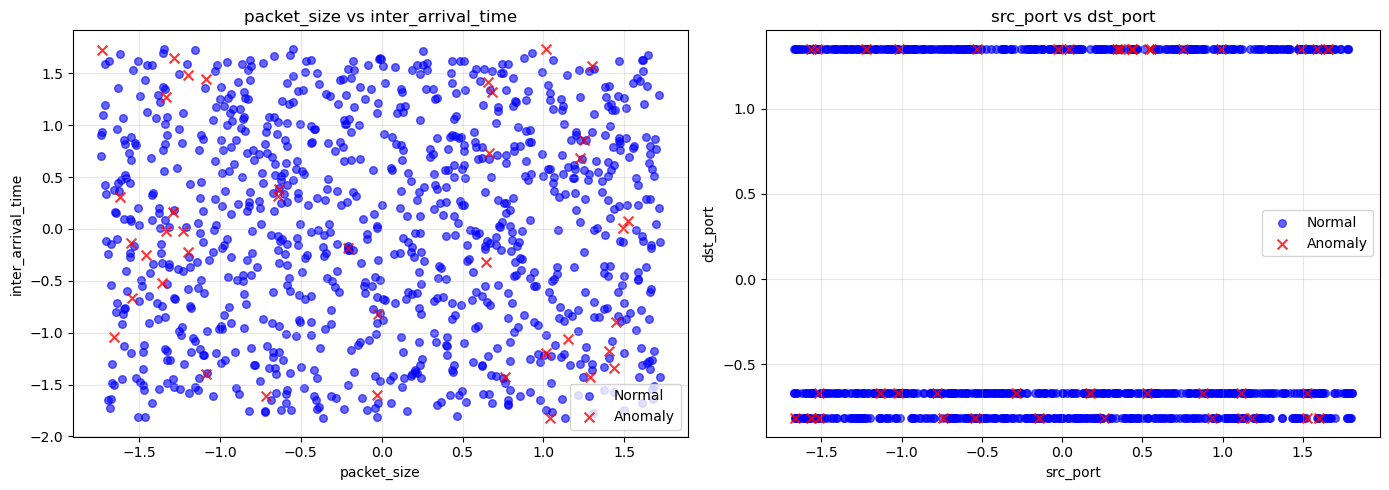

Normal data points: 960
Anomalies detected: 40


In [36]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
normal = scaled_features_df[scaled_features_df['anomaly'] == 1]
anomaly = scaled_features_df[scaled_features_df['anomaly'] == -1]
 
# Plot 1: Feature1 vs Feature2
axes[0].scatter(normal[scaled_features_df.columns[0]], normal[scaled_features_df.columns[1]],
                color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly[scaled_features_df.columns[0]], anomaly[scaled_features_df.columns[1]],
                color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel(scaled_features_df.columns[0])
axes[0].set_ylabel(scaled_features_df.columns[1])
axes[0].set_title(f"{scaled_features_df.columns[0]} vs {scaled_features_df.columns[1]}")
axes[0].legend()
axes[0].grid(True, alpha=0.3)
 
# Plot 2: Feature3 vs Feature4
axes[1].scatter(normal[scaled_features_df.columns[2]], normal[scaled_features_df.columns[3]],
                color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly[scaled_features_df.columns[2]], anomaly[scaled_features_df.columns[3]],
                color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel(scaled_features_df.columns[2])
axes[1].set_ylabel(scaled_features_df.columns[3])
axes[1].set_title(f"{scaled_features_df.columns[2]} vs {scaled_features_df.columns[3]}")
axes[1].legend()
axes[1].grid(True, alpha=0.3)
 
plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")
